### Event Distribution of Mice with Time

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import direction_transition as dit
import paths

In [2]:
def learning_score_grad(diff: pd.DataFrame, left_start = True) -> float:
    ans = 0
    curr_expect = not left_start

    for idx, row in diff.iterrows():
        if idx == 0: continue
        grad = row['Difference'] - diff.loc[idx - 1]['Difference']
        if curr_expect:
            ans += grad
        else:
            ans -= grad
        curr_expect = not curr_expect
    return ans

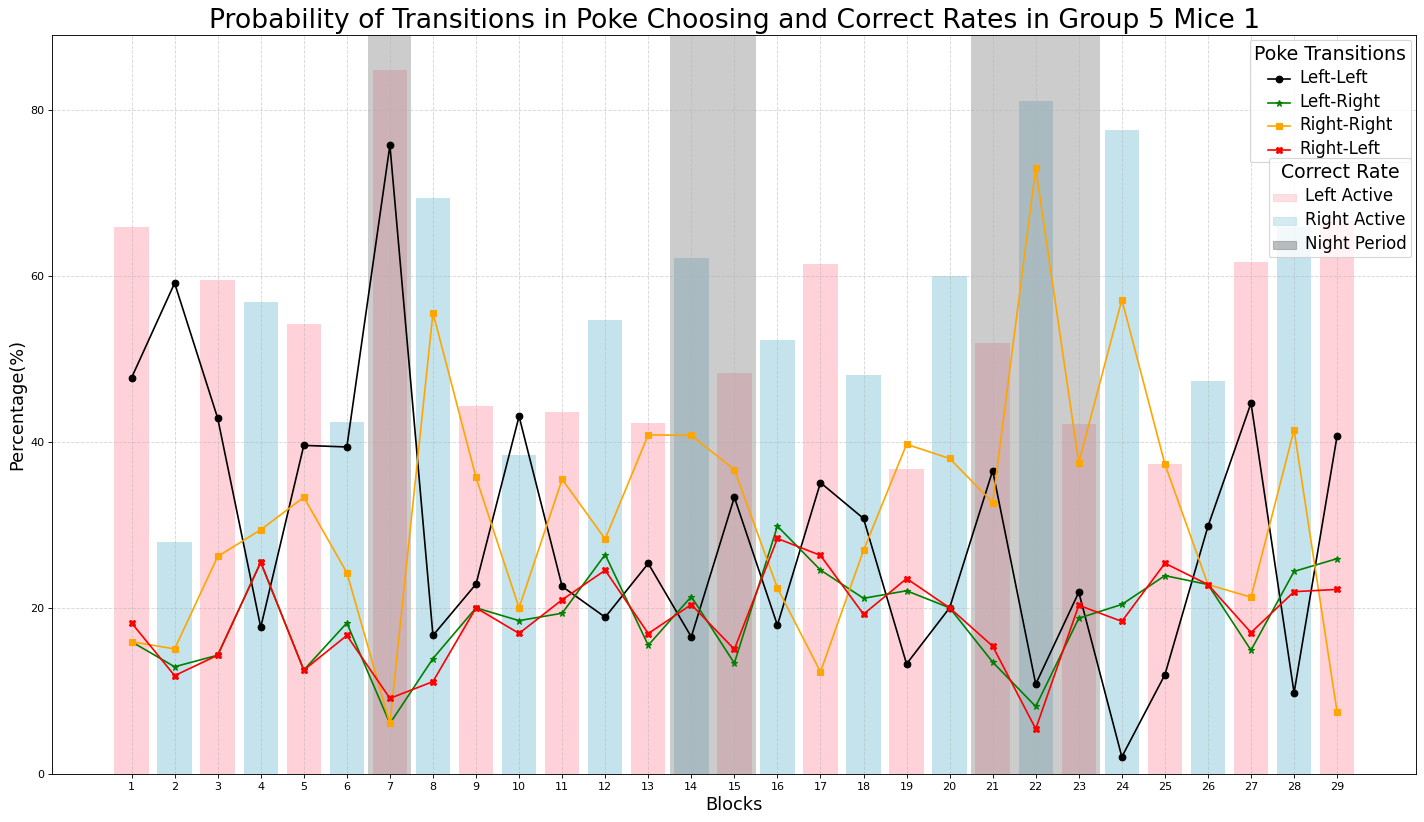

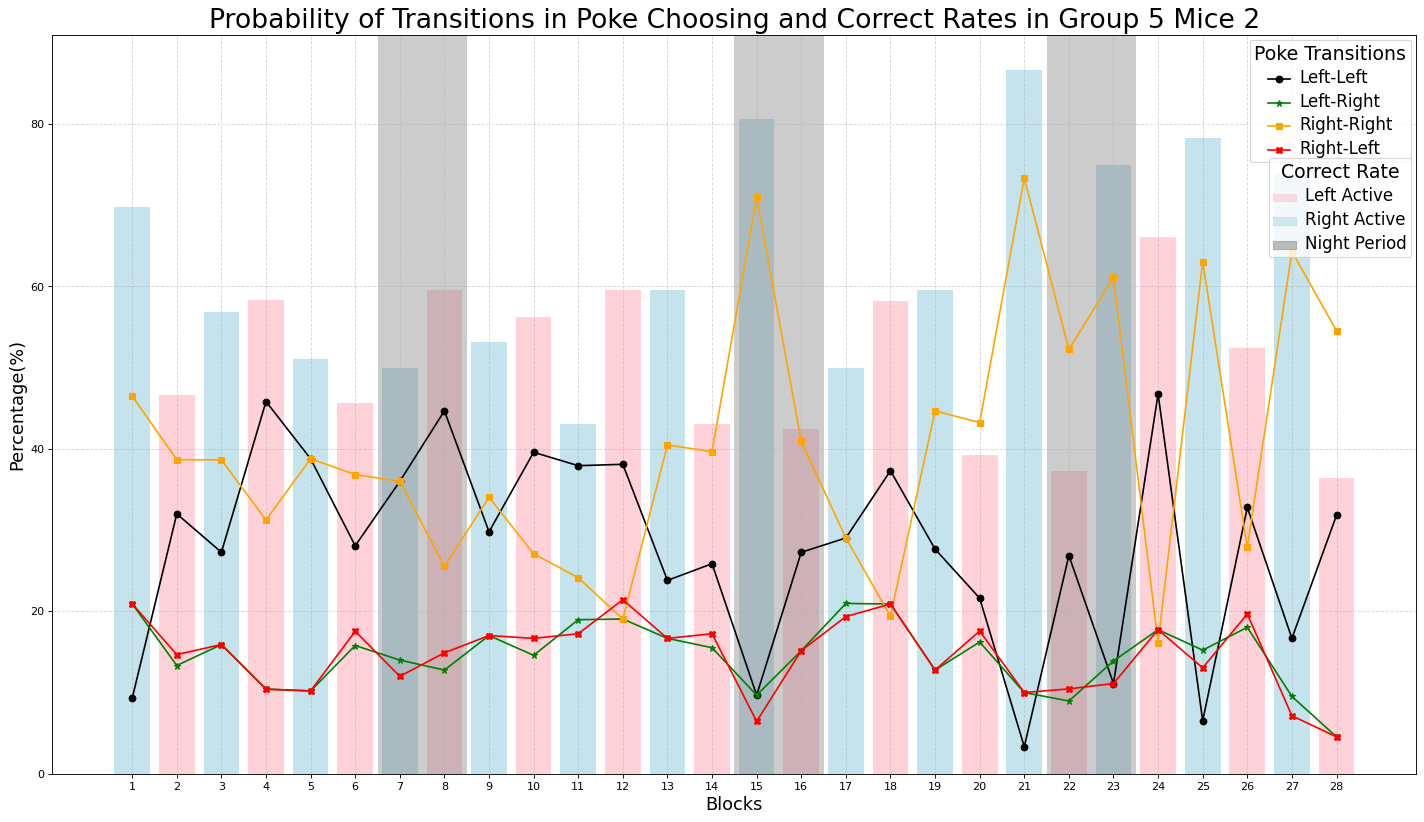

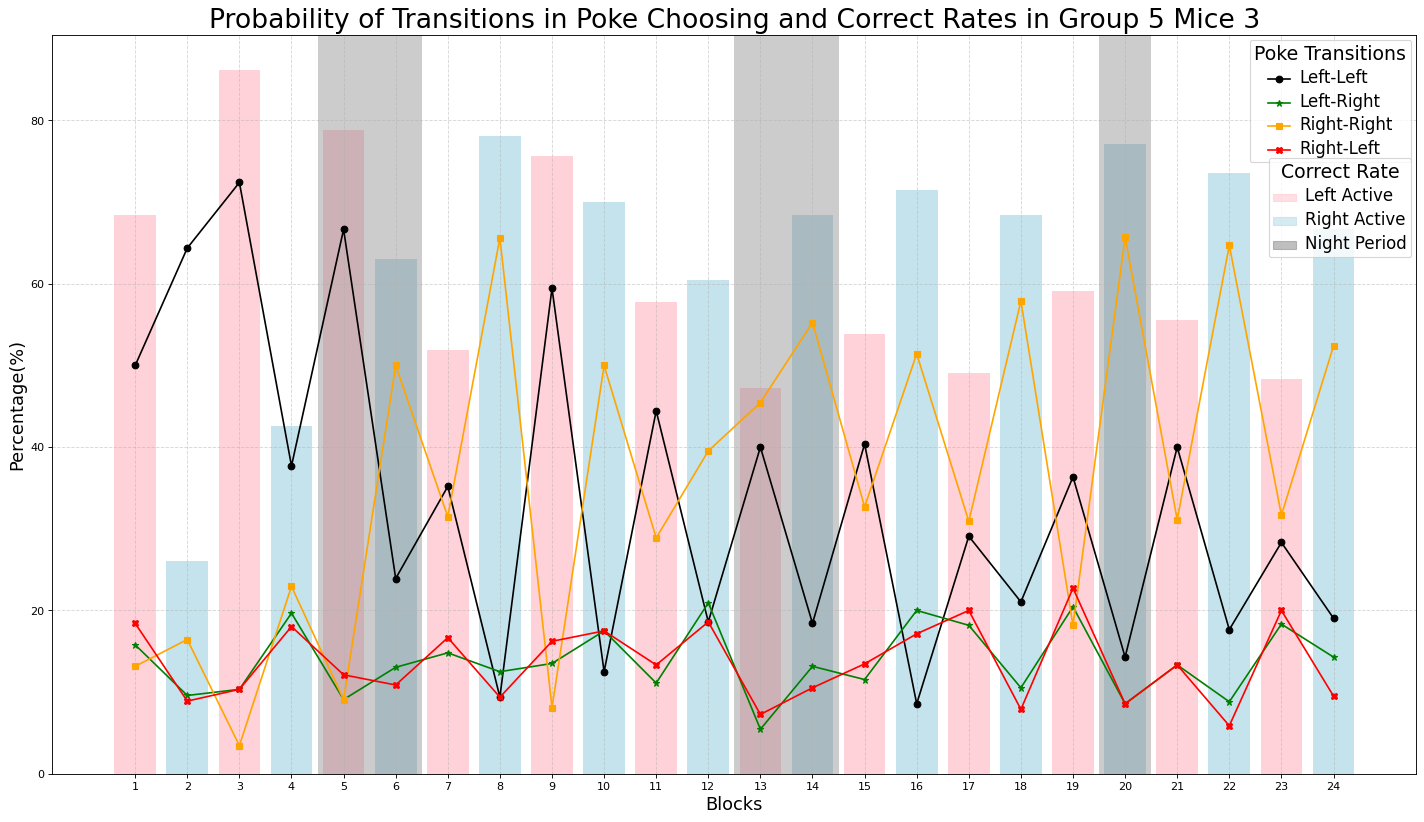

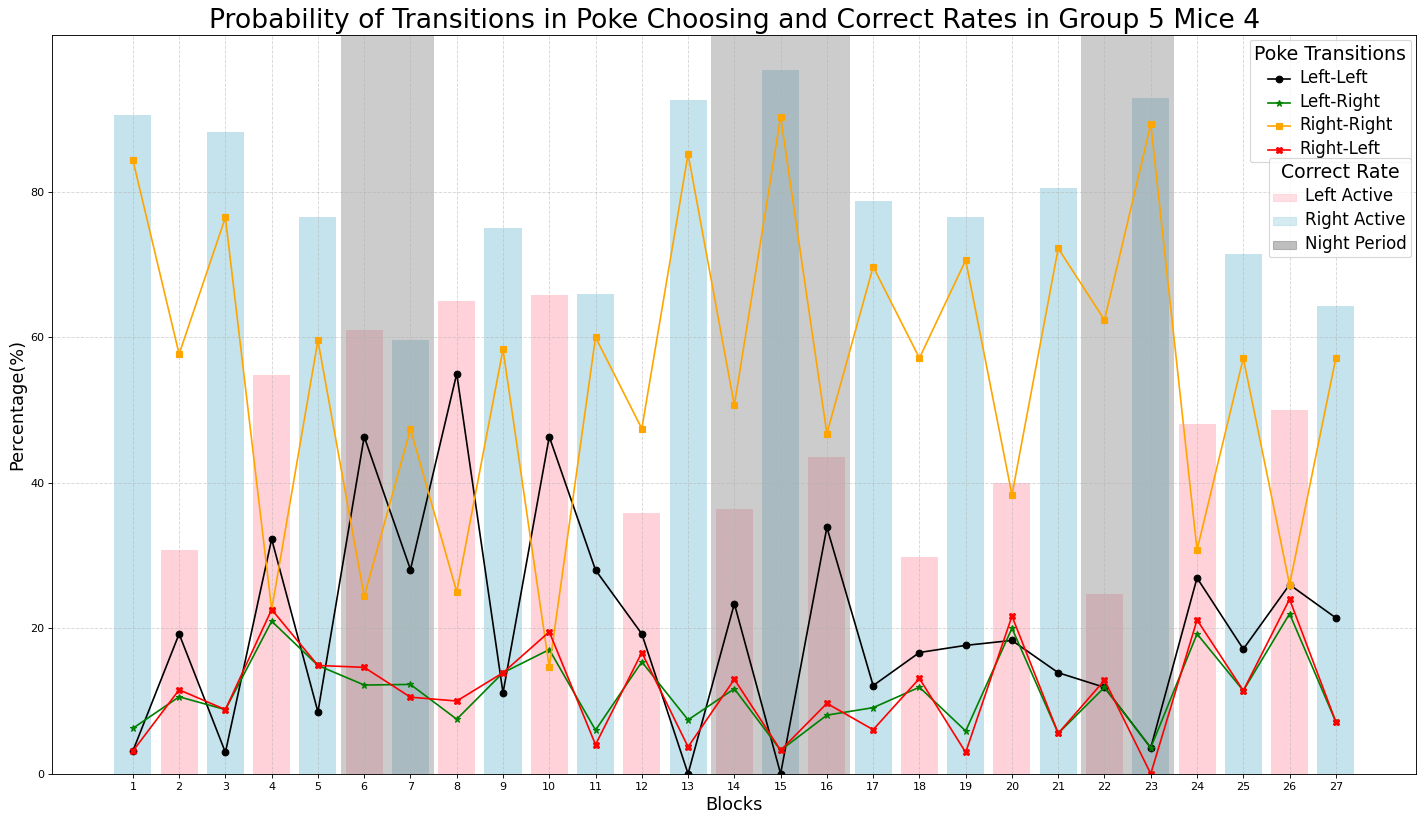

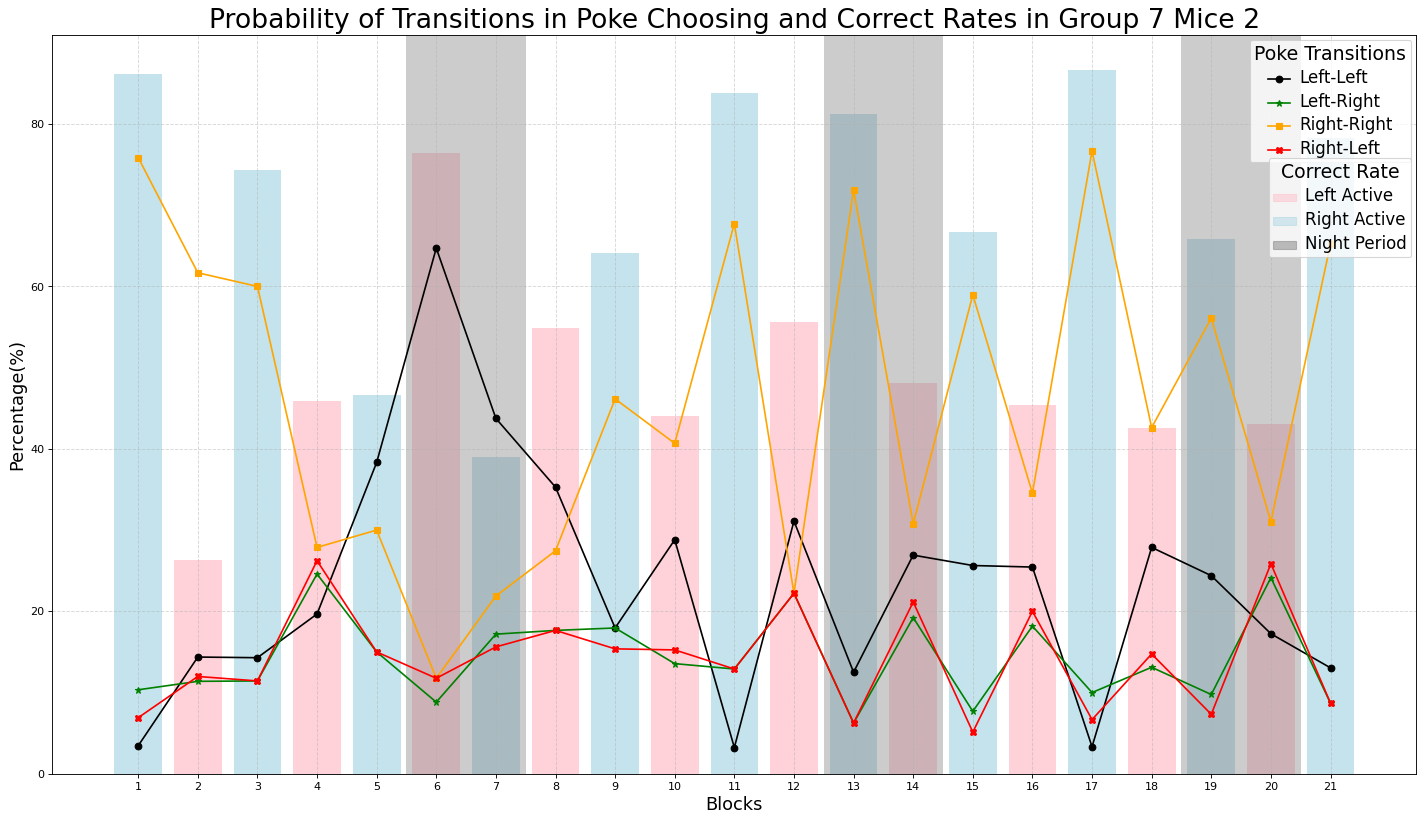

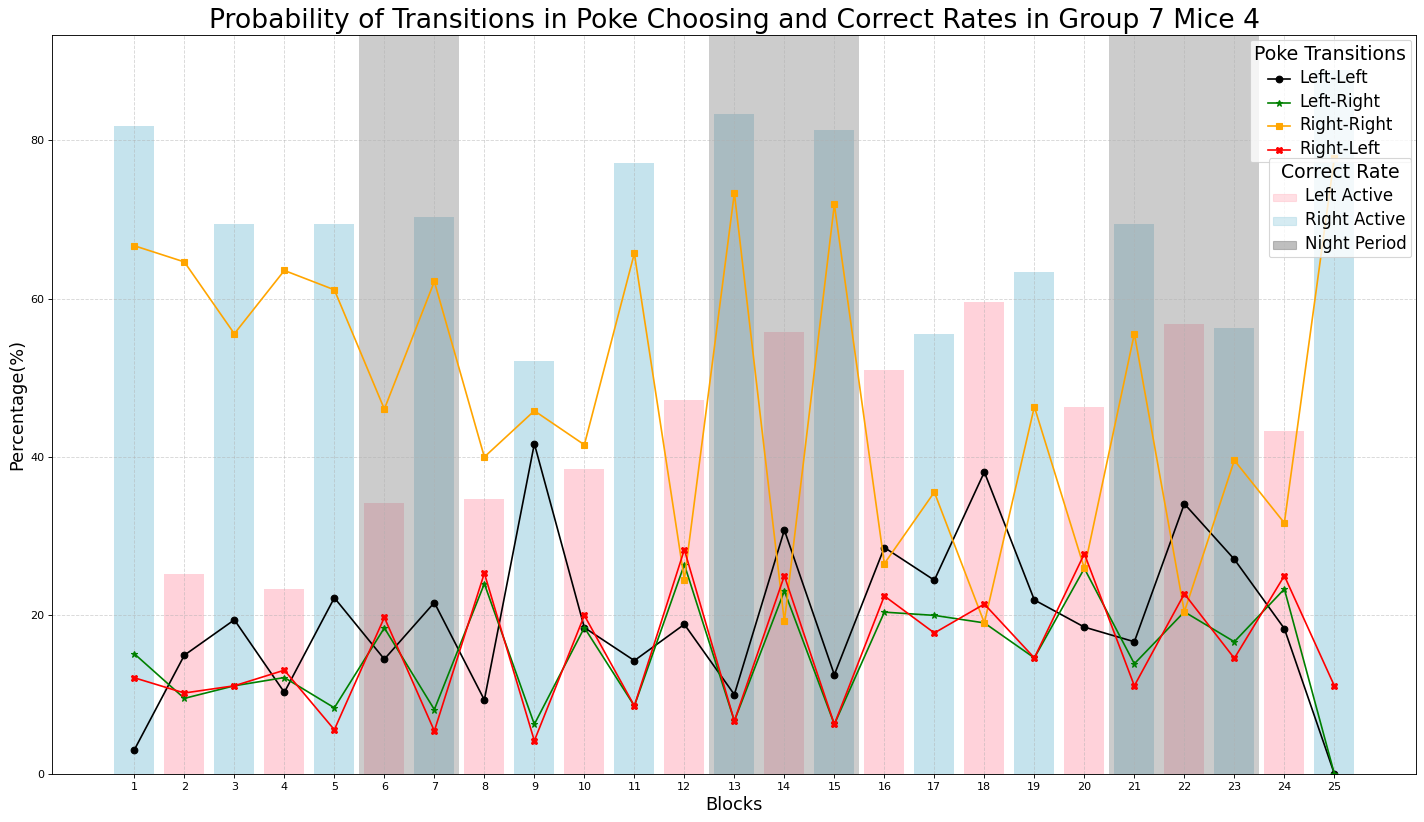

In [3]:
ctrl_scores = []

for path in paths.contigency_flip_ctrl:
    data_dropped = dit.csv_read_clean(path=path)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_csv(data_stats, blocks, path)
    diff, left_start = dit.get_difference_key(data_stats)
    ctrl_scores.append(learning_score_grad(diff, left_start))

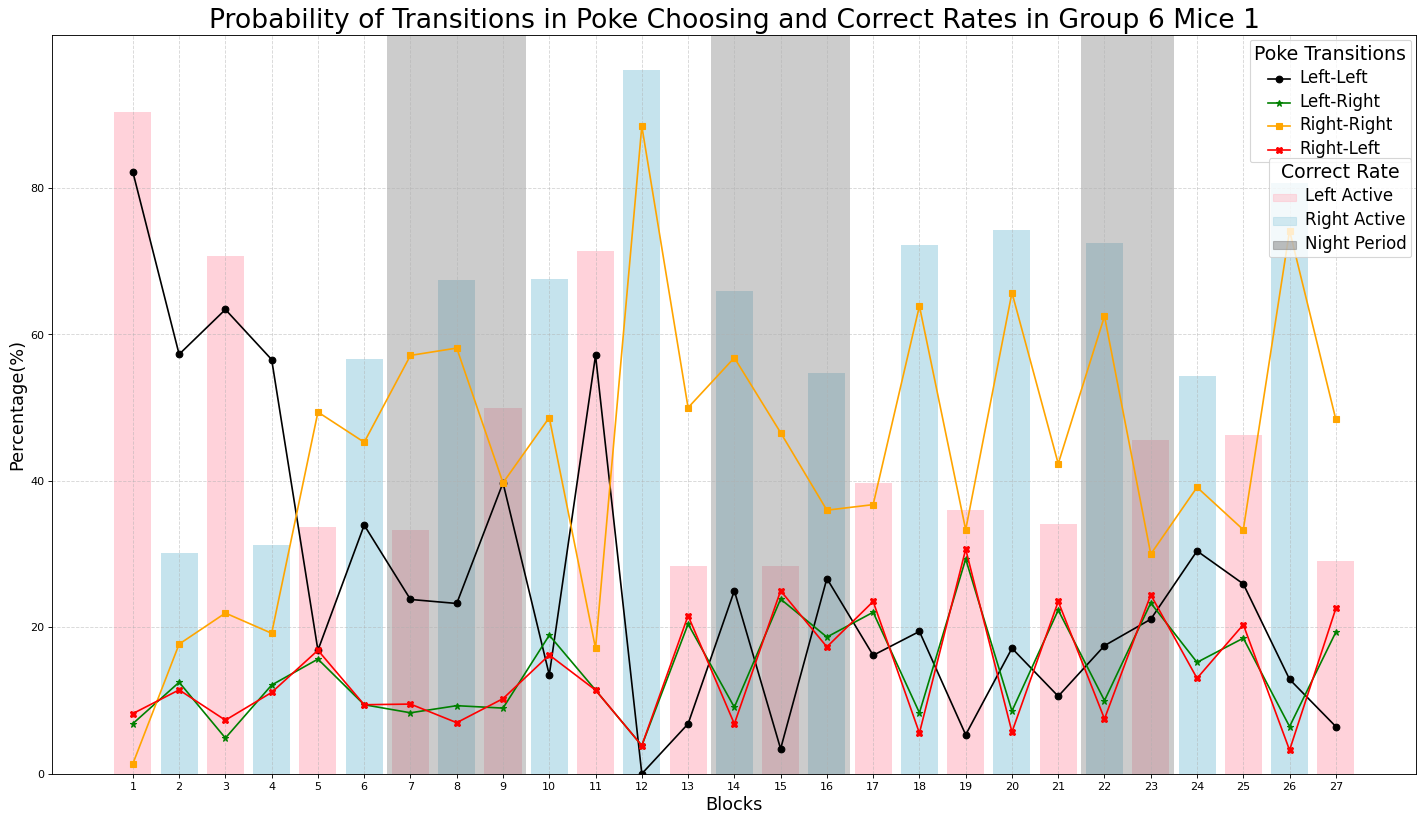

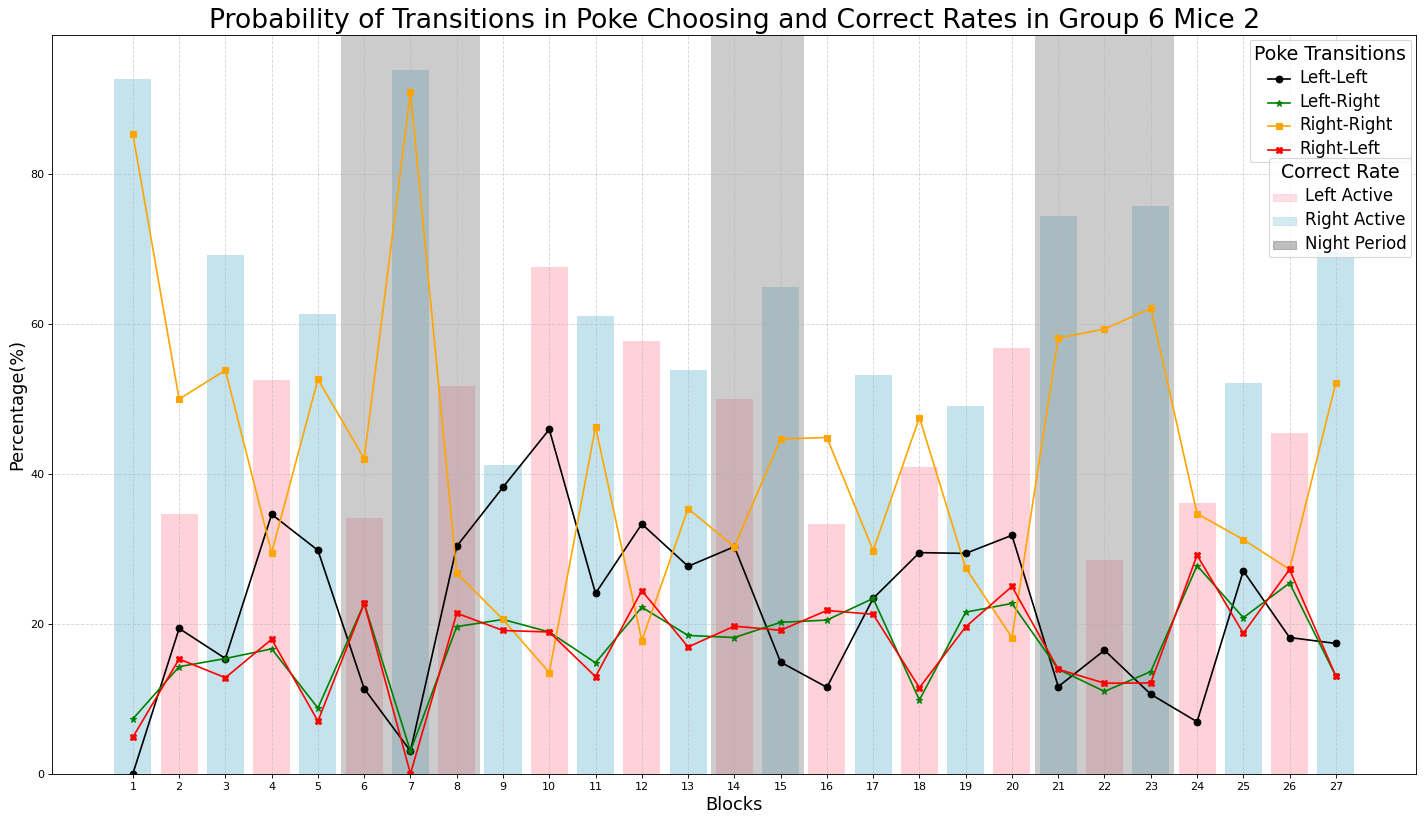

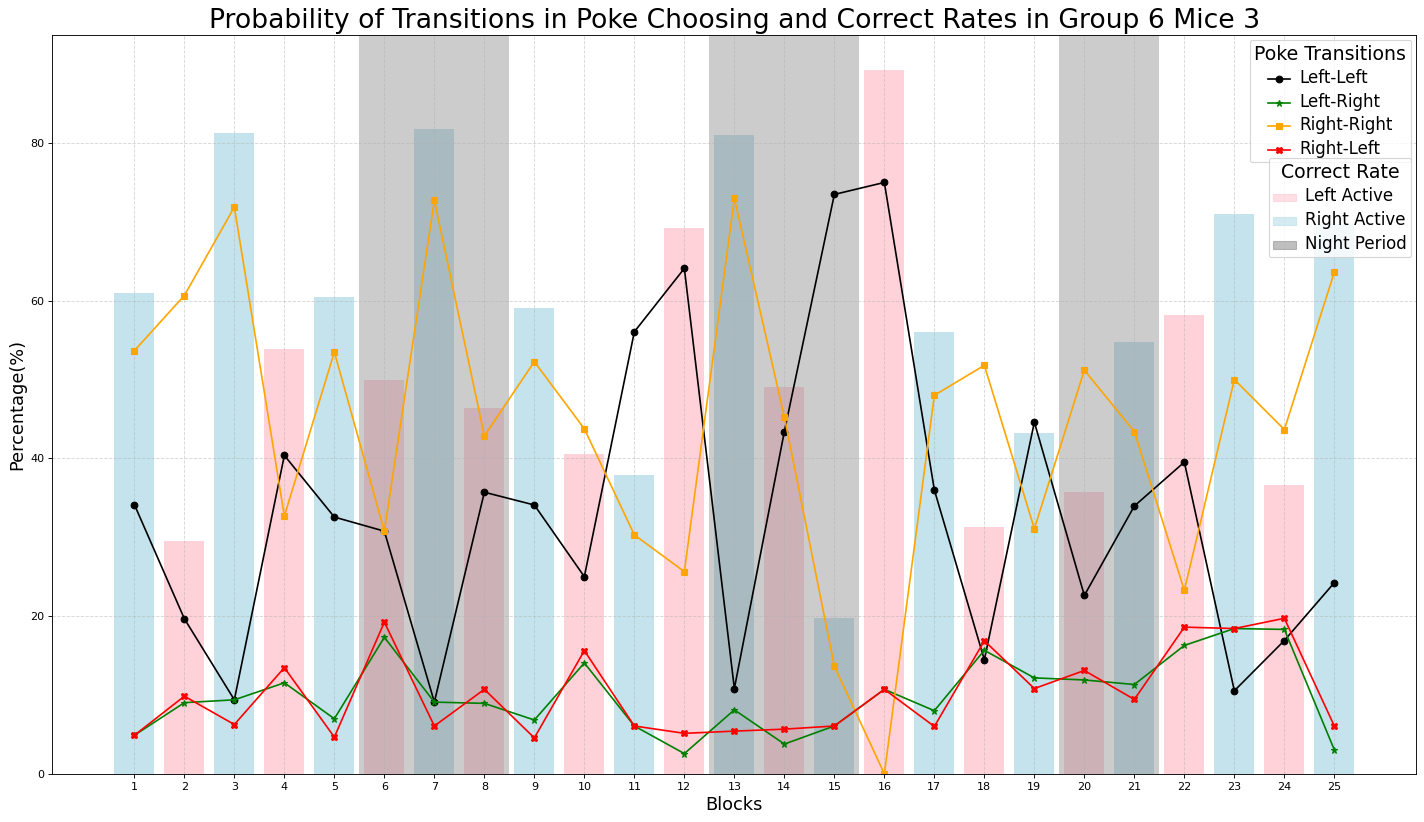

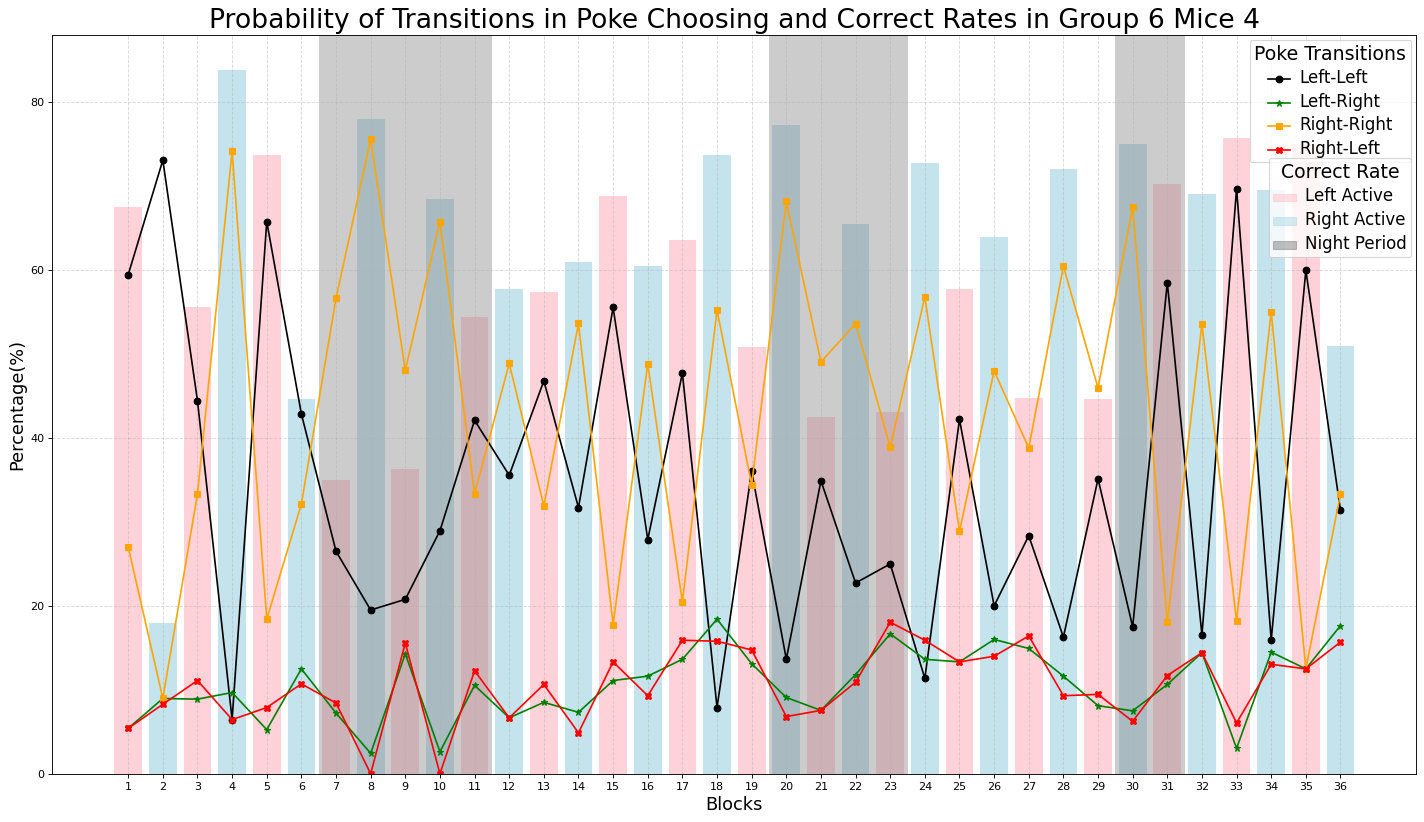

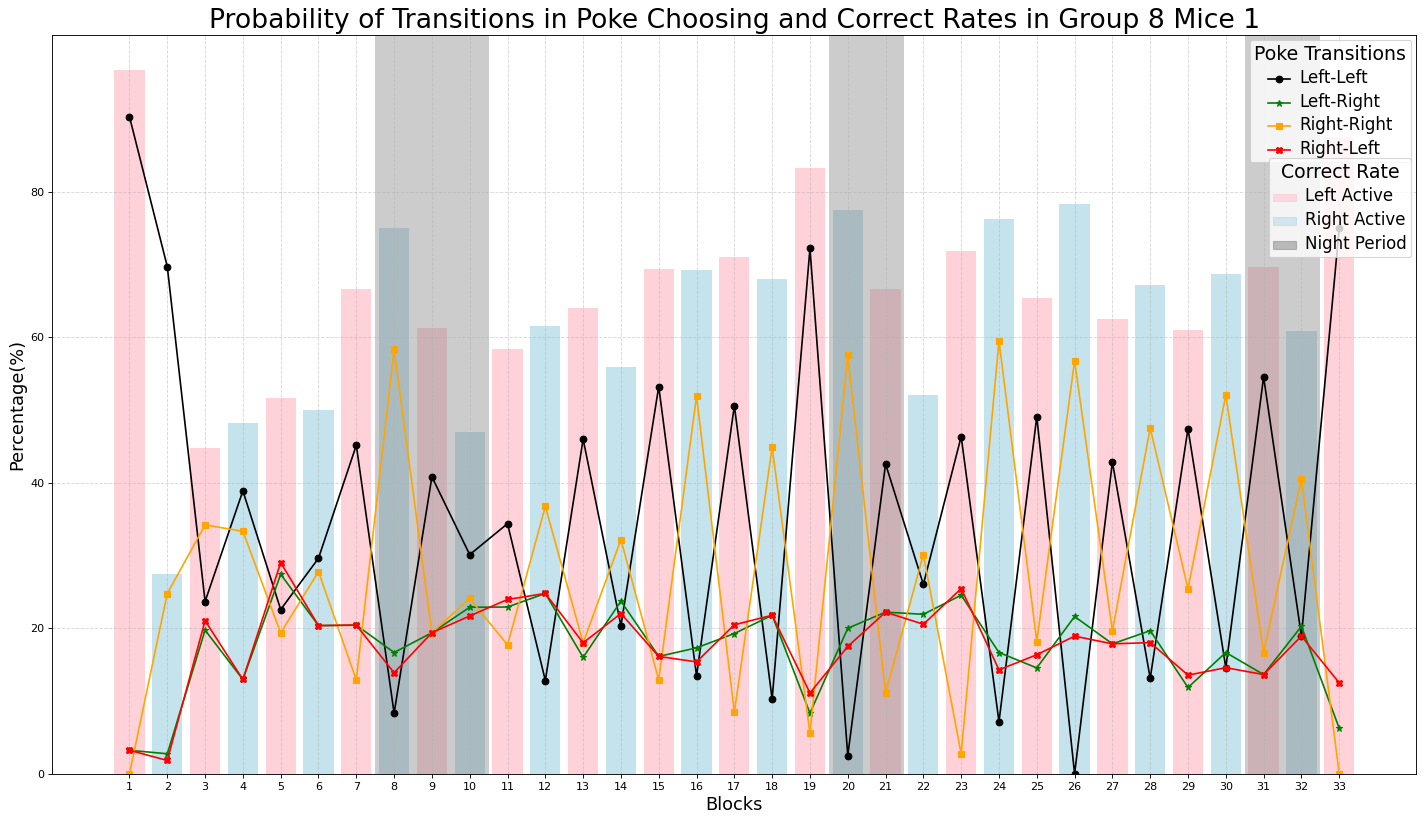

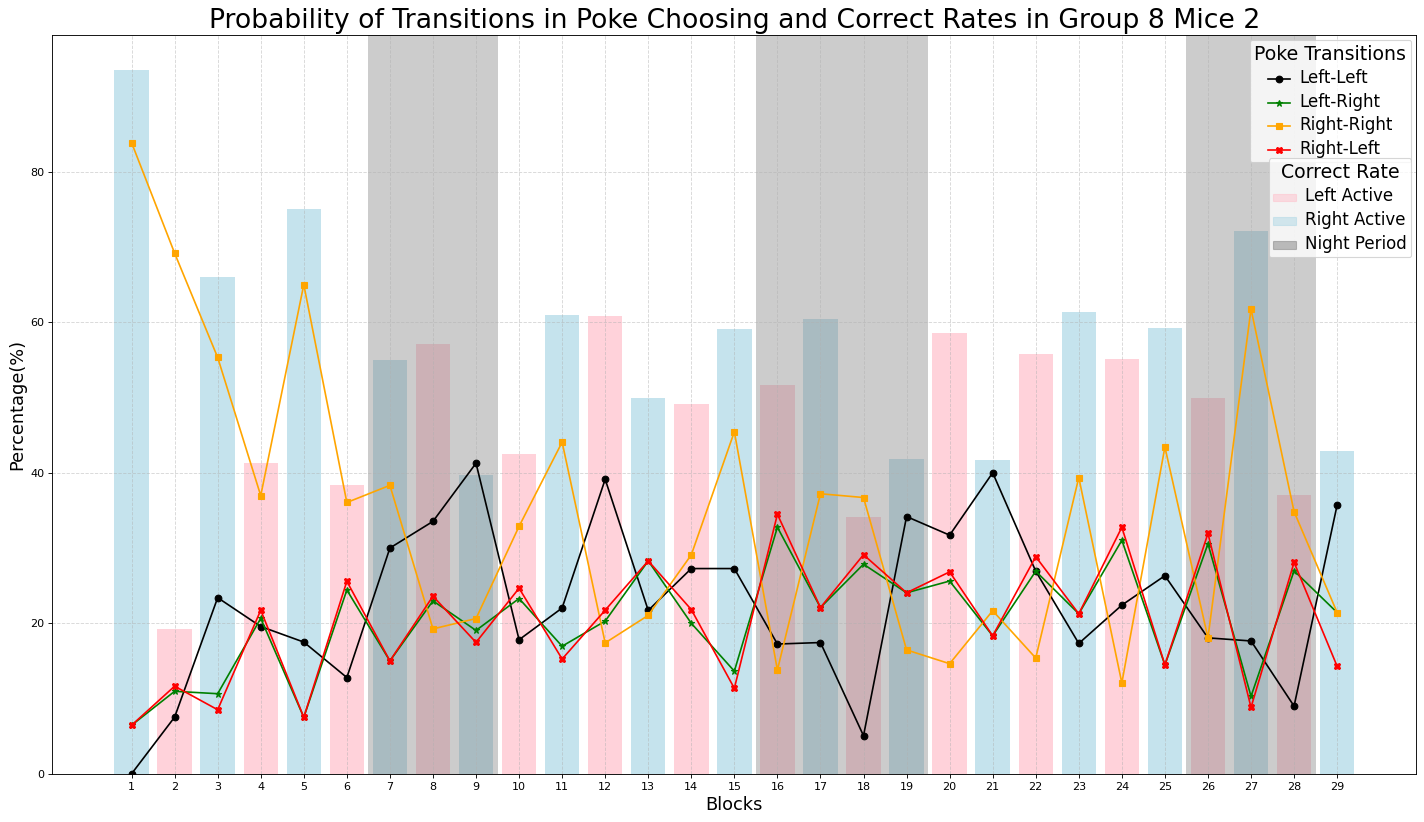

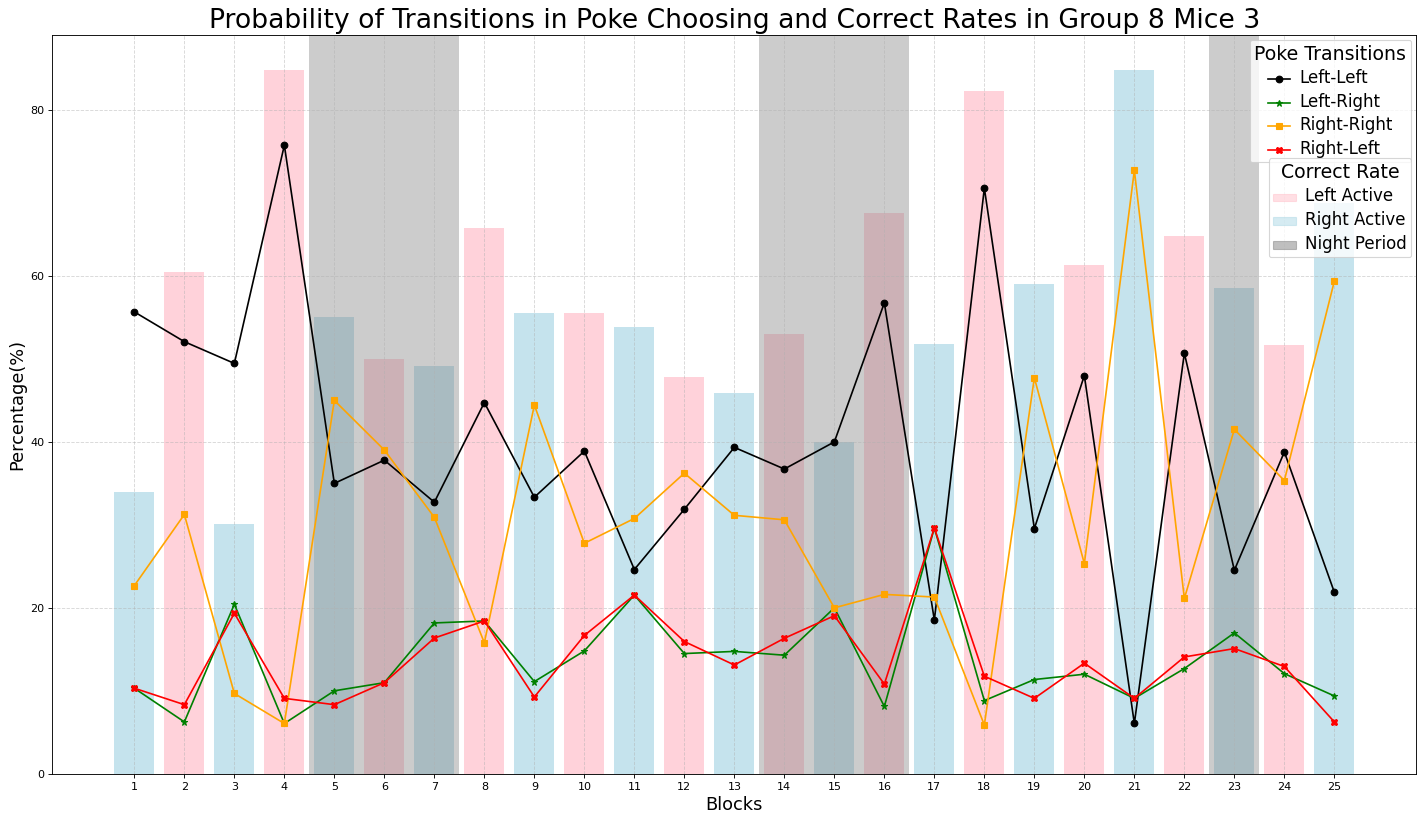

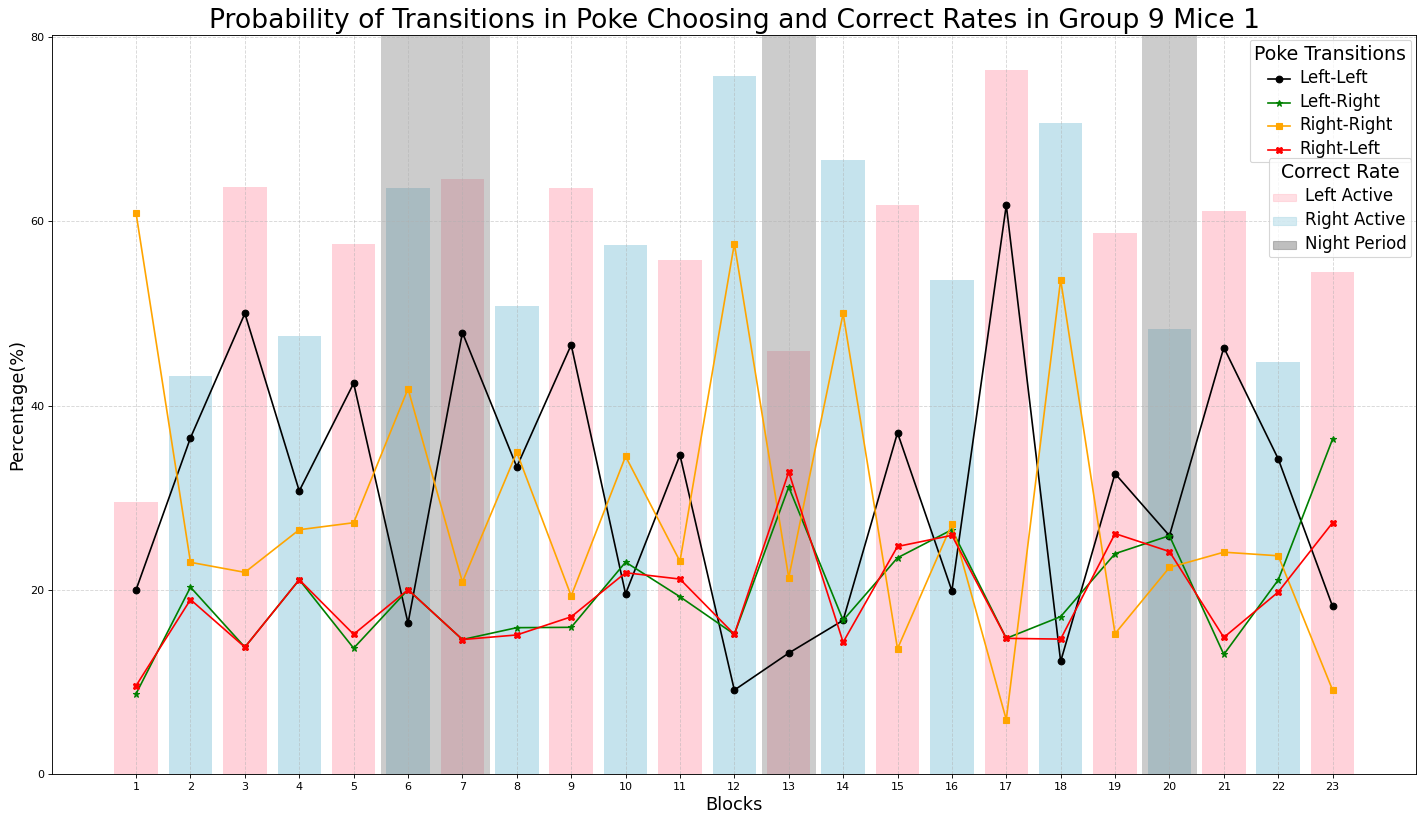

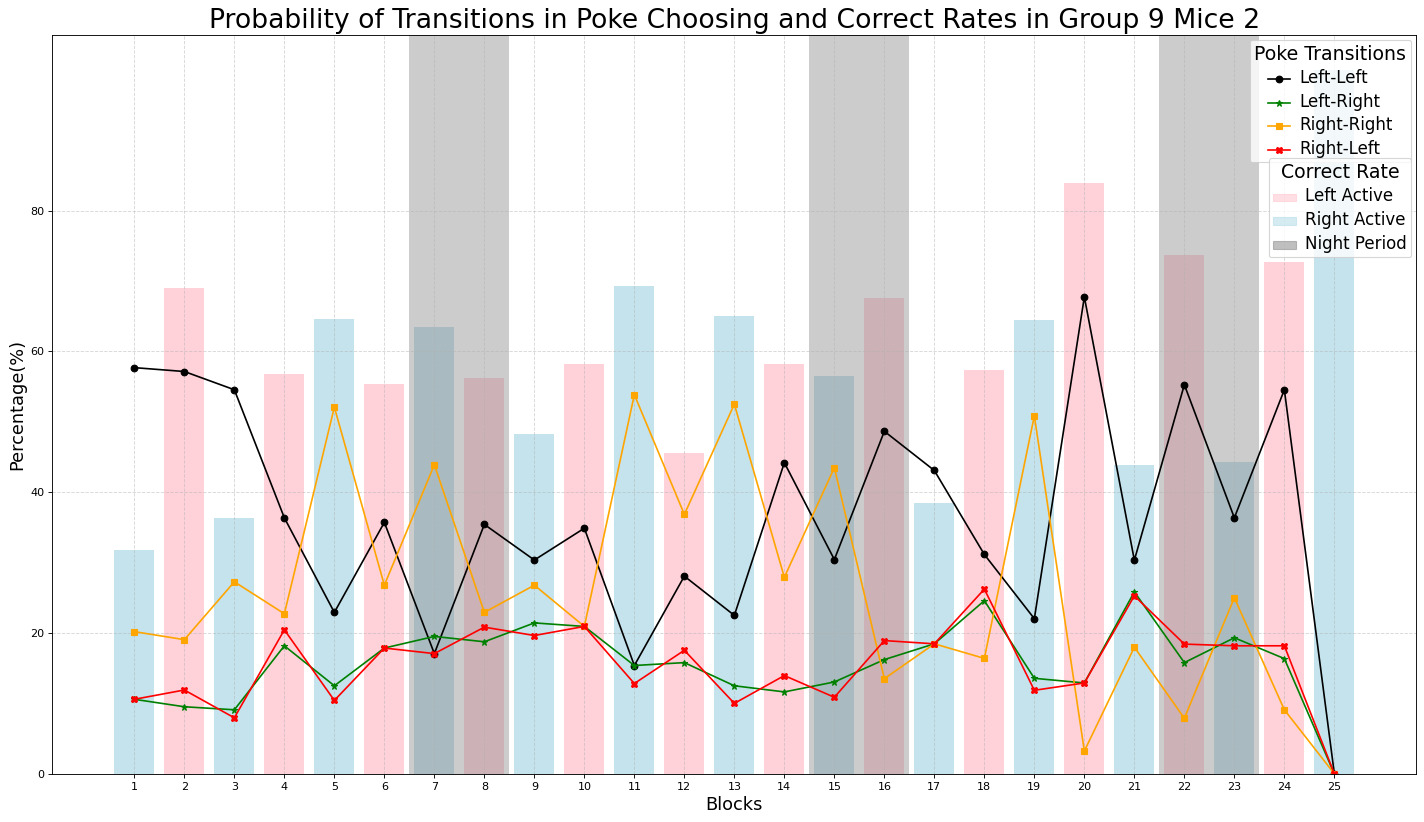

In [4]:
cask_scores = []

for path in paths.contigency_flip_cask:
    data_dropped = dit.csv_read_clean(path=path)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_csv(data_stats, blocks, path)
    diff, left_start = dit.get_difference_key(data_stats)
    cask_scores.append(learning_score_grad(diff, left_start))

In [12]:
print(ctrl_scores)
print(cask_scores)

[714.14, 1098.9499999999998, 658.17, 566.0999999999999]
[388.09999999999997, 471.7099999999999, 389.2699999999999, 1461.7900000000004, 702.03, 689.6600000000001, 740.4599999999999]


In [6]:
import intervals as invs

In [11]:
import numpy as np

print(np.mean(ctrl_scores), np.std(ctrl_scores))
print(np.mean(cask_scores), np.std(cask_scores))

759.3399999999999 203.07329871255843
691.86 343.83536384230683


In [9]:
invs.MannWhitneyUTest(ctrl_scores, cask_scores)

U Statistic: 17.0
P-value: 0.6484848484848484
There is no significant difference between the two groups.


* In flipping poke case, we find that there is left or right stage (mice display a tendency to stick to one direction)
* there is only one stage at a time, and transition can take some times (1-2 stage to move to another)
* Generally, the accuracy is improved (>50~60% at the end and higher than the beginning)